# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
import kagglehub

---

# 1) Carregar os dados

In [4]:
# Download última versão
path = kagglehub.dataset_download("ravi72munde/uber-lyft-cab-prices")

print("Path to dataset files:", path)

100%|██████████| 73.5M/73.5M [00:00<00:00, 140MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ravi72munde/uber-lyft-cab-prices/versions/4


In [5]:
# Carregar o arquivo CSV para o pandas
rideshare = pd.read_csv(f'{path}/cab_rides.csv')
rideshare.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [6]:
rideshare.shape

(693071, 10)

## Remover as colunas product_id e id (df.drop)

In [8]:
df = rideshare.drop(['product_id', 'id'], axis = 1)
df.shape


(693071, 8)

## Mostrar informações gerais sobre o dataset (df.head, df.info, df.describe)

In [9]:
df.head(5)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,Lyft XL


In [10]:
df.info()
# identificados dados nulos na coluna price.
# Tipos de dados:  float64(27), int64(17), object(7)
# O atibulo 'price' possui dados faltantes
# Há 4 atributos numéricos e 4 categóricos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 42.3+ MB


In [11]:
df.describe()
# pode-se ter uma ideia da média do valor das corridas, distância e até temperatura média de Boston
# Média de preços: US$ 16,54
# Média de distância percorrida: 2,189 mi

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


---

# 2) EDA inicial

## Distribuição das Variáveis Numéricas

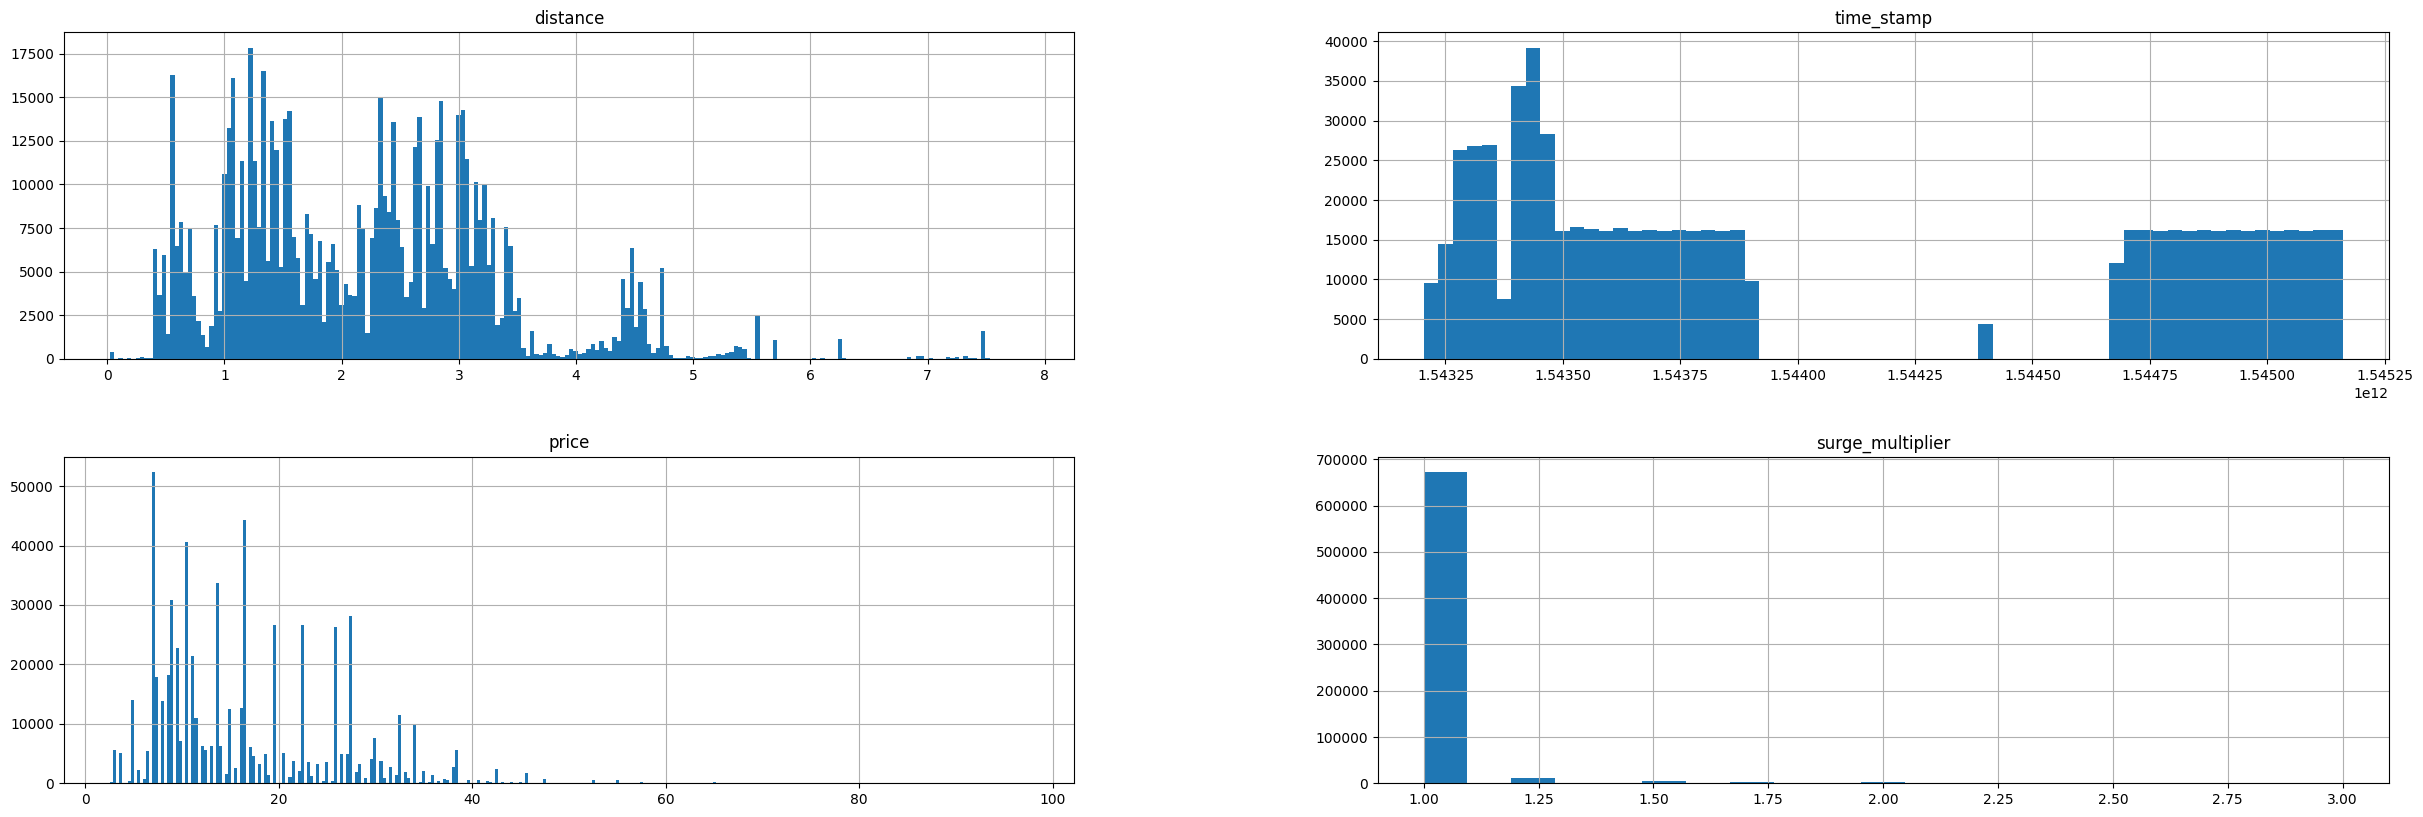

In [12]:
df.hist(bins='auto', figsize=(30,120), layout=(22,2));

## Distribuição das Variáveis Categóricas

### Estatísticas descritivas (df.describe)

In [13]:
df.select_dtypes(object).describe()

,cab_type,destination,source,name
count,693071,693071,693071,693071
unique,2,12,12,13
top,Uber,Financial District,Financial District,UberXL
freq,385663,58851,58857,55096


### Gráfico de barras demonstrando a distribuição entre as classes de cada atributo

In [18]:
df['cab_type'].value_counts()

,count
cab_type,
Uber,385663
Lyft,307408


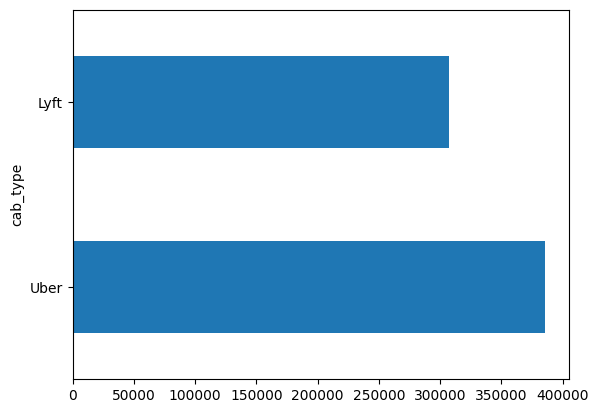

In [19]:
df['cab_type'].value_counts().plot(kind='barh');

In [16]:
df['destination'].value_counts()

,count
destination,
Financial District,58851
Theatre District,57798
Back Bay,57780
Haymarket Square,57764
Boston University,57764
Fenway,57757
North End,57756
Northeastern University,57755
South Station,57749


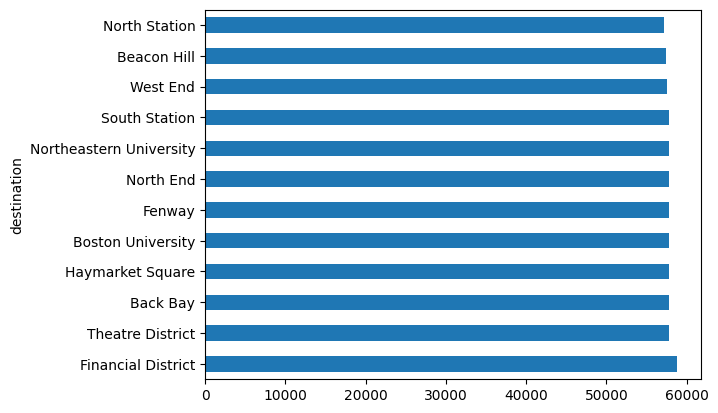

In [17]:
df['destination'].value_counts().plot(kind='barh');

In [14]:
df['source'].value_counts()

,count
source,
Financial District,58857
Theatre District,57813
Back Bay,57792
Boston University,57764
North End,57763
Fenway,57757
Northeastern University,57756
South Station,57750
Haymarket Square,57736


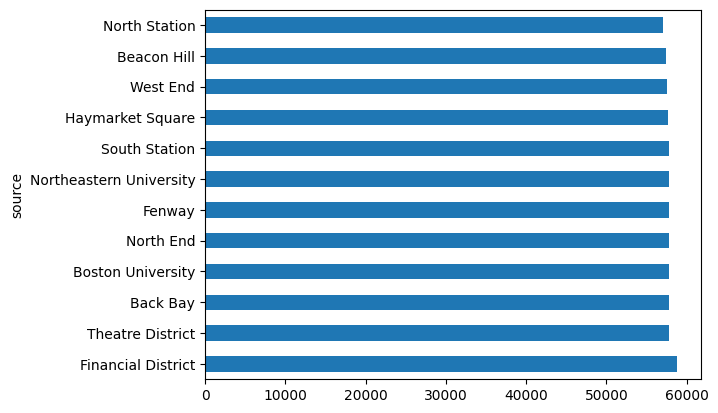

In [15]:
df['source'].value_counts().plot(kind='barh');

In [20]:
df['name'].value_counts()

,count
name,
UberXL,55096
WAV,55096
Black SUV,55096
Black,55095
Taxi,55095
UberX,55094
UberPool,55091
Lux,51235
Lux Black XL,51235


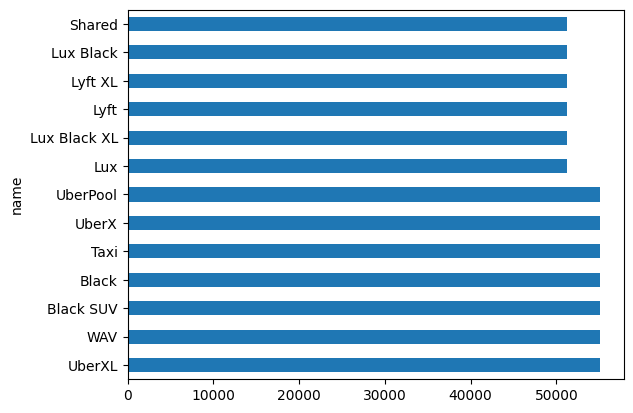

In [21]:
df['name'].value_counts().plot(kind='barh');

In [25]:
df.shape

(693071, 8)

## Verificar se existem dados duplicados

In [26]:
df1 = df.drop_duplicates()
df1
# Há 693071 - 692947 =  124 linhas duplicadas

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,Lyft XL
...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,UberX
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,Taxi
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,Black SUV


In [27]:
df[df.duplicated()]
# Visualização das 124 linhas duplicadas

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name
129336,1.11,Uber,1543458861714,West End,North End,NaN,1.0,Taxi
132755,0.55,Uber,1544936112134,South Station,Theatre District,7.5,1.0,UberX
136330,5.56,Uber,1543618686569,Boston University,Financial District,NaN,1.0,Taxi
136774,1.45,Lyft,1544940606441,Boston University,Back Bay,19.5,1.0,Lux Black
139372,1.64,Uber,1543784282610,Back Bay,Northeastern University,NaN,1.0,Taxi
...,...,...,...,...,...,...,...,...
665689,1.57,Uber,1545081003706,North End,Theatre District,8.5,1.0,UberPool
670232,2.80,Uber,1543858378933,Boston University,West End,10.5,1.0,WAV
672597,0.91,Uber,1543557778291,Beacon Hill,Haymarket Square,10.5,1.0,UberXL
677195,3.05,Uber,1544739015433,Fenway,North Station,34.0,1.0,Black SUV


## Observar se existem dados faltantes

In [28]:
df.isnull().sum().sort_values(ascending = False)
# coluna price com 55095 dados nulos

,0
price,55095
distance,0
time_stamp,0
cab_type,0
destination,0
source,0
surge_multiplier,0
name,0


---

# 3) Limpar e separar o dataset

## Utilizando o dataset carregado em 1) já retiradas as colunas sugeridas

In [29]:
df.shape

(693071, 8)

In [30]:
df1.shape
# Em 'df1' foram retiradas as linhas duplicadas de 'df'

(692947, 8)

## Remover linhas com dados faltantes na variável alvo

In [31]:
df2 = df1.dropna()
df2.shape
# Retirando os dados faltantes de 'price'

(637905, 8)

## Remover linhas duplicadas

In [32]:
df2.isnull().sum().sort_values(ascending = False)
# Verificação da permenência de dados duplicados
# Não há a necessidade de se retirar, pois já foram retirados anteriormente

,0
distance,0
cab_type,0
time_stamp,0
destination,0
source,0
price,0
surge_multiplier,0
name,0


## Reduzir o conjunto de dados para 3000 amostras para cada categoria do atributo

In [33]:
num_instancias_por_classe = 3000
df2_temp = []
for classe in df2['name'].unique():
    temp = df2[df2['name'] == classe].sample(n=num_instancias_por_classe, random_state=42)
    df2_temp.append(temp)
df2_small = pd.concat(df2_temp, axis=0)
print('-'*30)
print('#instâncias em relação a coluna name')
print(df2_small['name'].value_counts())
print('-'*30)

df2_small

------------------------------
#instâncias em relação a coluna name
name
Shared          3000
Lux             3000
Lyft            3000
Lux Black XL    3000
Lyft XL         3000
Lux Black       3000
UberXL          3000
Black           3000
UberX           3000
WAV             3000
Black SUV       3000
UberPool        3000
Name: count, dtype: int64
------------------------------


,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name
687904,3.17,Lyft,1543501979517,Fenway,North Station,7.0,1.0,Shared
190253,3.54,Lyft,1543612688572,North Station,Boston University,7.0,1.0,Shared
596995,2.47,Lyft,1543458860690,South Station,Beacon Hill,5.0,1.0,Shared
386098,1.72,Lyft,1543437847562,Haymarket Square,Theatre District,5.0,1.0,Shared
532729,1.45,Lyft,1545144012190,Back Bay,Fenway,3.0,1.0,Shared
...,...,...,...,...,...,...,...,...
340410,1.16,Uber,1543503185951,Theatre District,Haymarket Square,9.0,1.0,UberPool
650517,2.27,Uber,1543718580707,Boston University,Beacon Hill,10.0,1.0,UberPool
516653,4.40,Uber,1543761476111,Financial District,Fenway,11.5,1.0,UberPool
10587,1.21,Uber,1543632481736,North End,Financial District,6.0,1.0,UberPool


## Separar os conjuntos de treinamento, validação e teste para que cada um deles tenha exatamente o mesmo tamanho (12000), fazendo a divisão estratificada em função do atributo name e utilizando o random_state igual a 42

### Divisão estratificada entre treinamento e teste

In [34]:
df_t, df_test = train_test_split(df2_small, test_size=1/3, stratify=df2_small['name'], random_state=42)
# Divisão em conjunto de treino e teste. Proporção de 1/3 para o conjunto de teste

### Divisão estratificada do conjunto de treinamento entre treinamento e validação

In [35]:
df_train, df_val = train_test_split(df_t, test_size=0.5, random_state=42)

In [36]:
df_test.shape

(12000, 8)

In [37]:
df_t.shape

(24000, 8)

In [38]:
df_train.shape

(12000, 8)

In [39]:
df_val.shape

(12000, 8)

## Separar os dados entre X e y (X_train, y_train, X_val, …)

In [92]:
X_train = df_train.drop(columns='price')

In [93]:
y_train = df_train['price']

In [94]:
X_val = df_val.drop(columns='price')

In [95]:
y_val = df_val['price']

In [96]:
X_test = df_test.drop(columns='price')

In [97]:
y_test = df_test['price']

## Shape do X e y para o treinamento, validação e teste para confirmar que a divisão foi feita corretamente

In [98]:
X_train.shape

(12000, 7)

In [99]:
y_train.shape

(12000,)

In [100]:
X_val.shape

(12000, 7)

In [101]:
y_val.shape

(12000,)

In [102]:
X_test.shape

(12000, 7)

In [103]:
y_test.shape

(12000,)

# 4) EDA do Conjunto de Treinamento

## Observar as correlações das variáveis numéricas com a saída

In [55]:
# Filtrar apenas as colunas numéricas
df_train_numeric = df_train.select_dtypes(include=['number'])

# Calcular a correlação entre as variáveis numéricas
corr = df_train_numeric.corr()

# Ordenar os valores da correlação da coluna 'price'
corr['price'].sort_values(ascending=False)

,price
price,1.000000
distance,0.352240
surge_multiplier,0.259076
time_stamp,0.001025


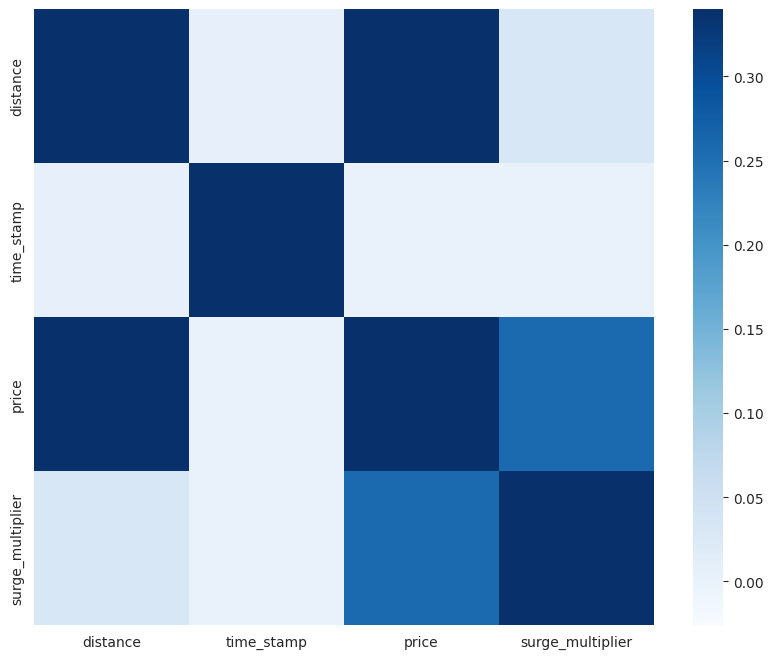

In [59]:
import seaborn as sns
sns.set_palette("Accent")
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
sns.heatmap(corr.abs(), vmin=-0.026, vmax = 0.34, annot=None, cmap="Blues");

# reduzi o heatmap para mostrar apenas a correlação de 1 a 34%

## Gráficos de distribuição entre as variáveis categóricas e a saída

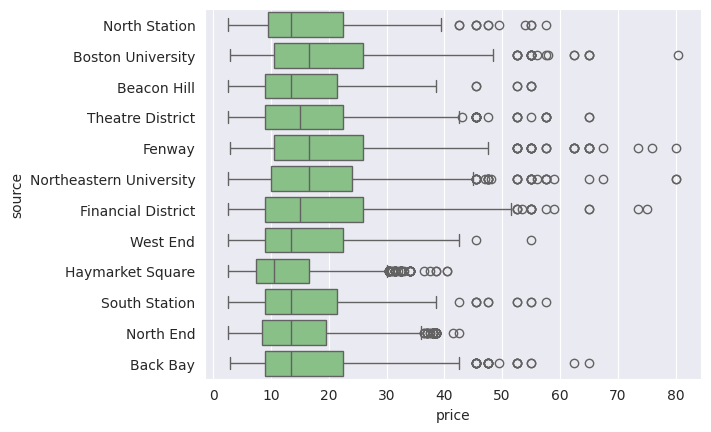

In [60]:
sns.boxplot(data=df2_small, x="price", y="source");
# Financial District foi origem da corrida com maior valor (amplitude), desconsiderando os outliers. Porém as maiores valores médios foram identificadas em Boston University, Fernway e Northeastern University
# Financial District também possui maior dispersão (QIII - QI)  dentre as demais origens
# Todos apresentam valores discrepantes (1,5 * (QIII - Qi))

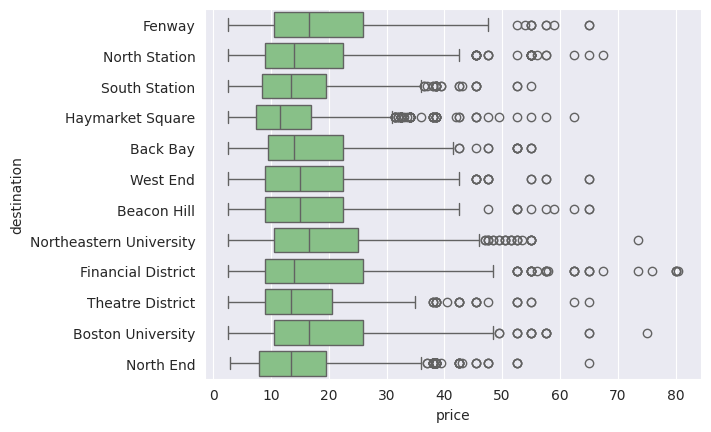

In [61]:
sns.boxplot(data=df2_small, x="price", y="destination");

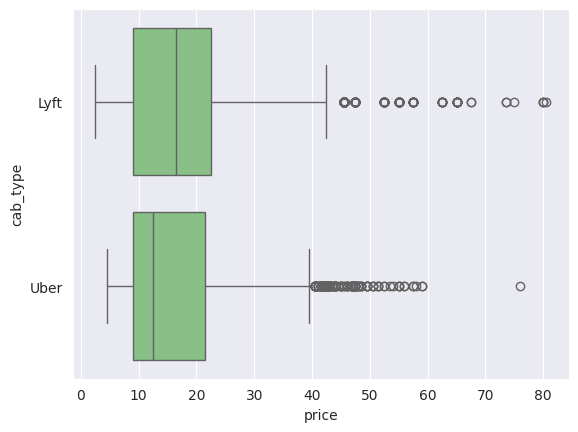

In [62]:
sns.boxplot(data=df2_small, x="price", y="cab_type");

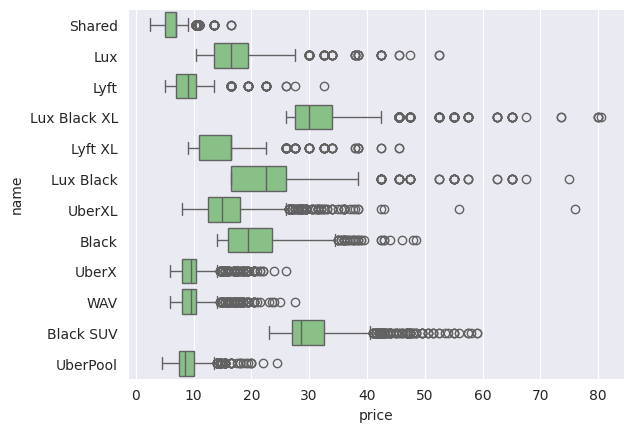

In [66]:
sns.boxplot(data=df2_small, x="price", y="name");

---

# 5) Treinamento dos Modelos

## Numéricas mais relevantes

In [105]:
X_train

,distance,cab_type,time_stamp,destination,source,surge_multiplier,name
679448,3.17,Lyft,1544796903496,Fenway,Theatre District,1.0,Lyft
68655,0.55,Uber,1543462687933,South Station,Theatre District,1.0,WAV
479124,1.07,Lyft,1543328303528,Northeastern University,Back Bay,1.0,Lux Black XL
248890,1.73,Lyft,1544873410972,South Station,North Station,1.0,Lux Black XL
102710,2.37,Lyft,1543802580939,Fenway,Beacon Hill,1.0,Lyft XL
...,...,...,...,...,...,...,...
68313,1.57,Uber,1543295003592,North End,Theatre District,1.0,WAV
591259,2.90,Lyft,1544746504050,Theatre District,Boston University,1.0,Lux Black XL
674654,3.45,Uber,1543741077762,South Station,Back Bay,1.0,UberX
630837,3.11,Lyft,1543490275769,Boston University,North Station,1.0,Shared


In [106]:
num_features_pos = [
    'distance',
    'surge_multiplier',
    'time_stamp']

In [107]:
num_features = num_features_pos

### Criar uma pipeline a partir do make_column_transformer e selecionar as variáveis numéricas desejadas como entrada

In [133]:
preprocess_num_features = make_column_transformer(('passthrough', num_features))


### ii) Juntar essa pipeline numérica com a regressão linear a partir da função make_pipeline

In [134]:
model_num_features = make_pipeline(preprocess_num_features, LinearRegression())


### iii) Treinar o modelo nos dados de treinamento

In [135]:
# Treinar o modelo
model_num_features.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                                  ['distance',
                                                   'surge_multiplier',
                                                   'time_stamp'])])),
                ('linearregression', LinearRegression())])

#### Observar os resultados nos conjuntos de treinamento e validação (MAPE e MAE)

In [136]:
y_train_pred_num_features = model_num_features.predict(X_train)
y_val_pred_num_features = model_num_features.predict(X_val)
print(f'Train MAE Numéricas mais relevantes: {mean_absolute_error(y_train, y_train_pred_num_features)}')
print(f'Train MAPE Numéricas mais relevantes: {mean_absolute_percentage_error(y_train, y_train_pred_num_features):1%}')
print(f'Val MAE Numéricas mais relevantes: {mean_absolute_error(y_val, y_val_pred_num_features)}')
print(f'Val MAPE Numéricas mais relevantes: {mean_absolute_percentage_error(y_val, y_val_pred_num_features):1%}')

Train MAE Numéricas mais relevantes: 6.919191936960232
Train MAPE Numéricas mais relevantes: 56.034108%
Val MAE Numéricas mais relevantes: 6.961811693825589
Val MAPE Numéricas mais relevantes: 55.816027%


In [137]:
print(f'b = {model_num_features.steps[1][1].intercept_}, w = {model_num_features.steps[1][1].coef_}')

b = -77.06991847778156, w = [2.83937627e+00 2.36288619e+01 4.10516066e-11]


### Comparar os resultados do modelo aplicando ou não o StandardScaler na pipeline de pré processamento

In [138]:
preprocess_num_features_normal = make_column_transformer((StandardScaler(), num_features))
model_num_features_normal = make_pipeline(preprocess_num_features_normal, LinearRegression())
model_num_features_normal.fit(X_train, y_train)
y_train_pred_num_features_normal = model_num_features_normal.predict(X_train)
y_val_pred_num_features_normal = model_num_features_normal.predict(X_val)
print(f'Train MAE Numéricas mais relevantes normalizada: {mean_absolute_error(y_train, y_train_pred_num_features_normal)}')
print(f'Train MAPE Numéricas mais relevantes normalizada: {mean_absolute_percentage_error(y_train, y_train_pred_num_features_normal):1%}')
print(f'Val MAE Numéricas mais relevantes normalizada: {mean_absolute_error(y_val, y_val_pred_num_features_normal)}')
print(f'Val MAPE Numéricas mais relevantes normalizada: {mean_absolute_percentage_error(y_val, y_val_pred_num_features_normal):1%}')

Train MAE Numéricas mais relevantes normalizada: 6.919191938751685
Train MAPE Numéricas mais relevantes normalizada: 56.034108%
Val MAE Numéricas mais relevantes normalizada: 6.961811701951517
Val MAPE Numéricas mais relevantes normalizada: 55.816027%


In [139]:
print(f'b = {model_num_features_normal.steps[1][1].intercept_}, w = {model_num_features_normal.steps[1][1].coef_}')

b = 16.547208333333334, w = [3.22556396 2.32289538 0.02824108]


In [140]:
def plot_learning_curves(model, x, y):
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model_num_features.fit(X_train[:m], y_train[:m])
        y_train_pred_num_features_2 = model_num_features.predict(X_train[:m])
        y_val_pred_num_features_2 = model_num_features.predict(X_val[:m])
        train_errors.append(mean_absolute_error(y_train[:m], y_train_pred_num_features_2))
        val_errors.append(mean_absolute_error(y_val[:m], y_val_pred_num_features_2))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

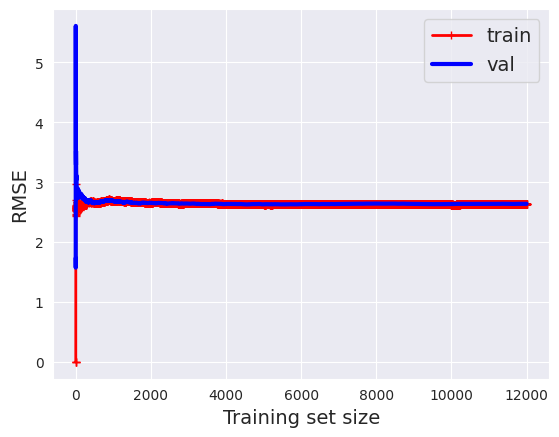

In [154]:
plot_learning_curves(model_num_features, X_train, y_train)
# plt.axis([0, 300, 0, 30])
plt.show()

* Modelo Numéricas mais relevantes (sem aplicação do Standard Scaler): Modelo
subajustado, pois apresentou baixo desempenho tanto nos dados de treinamento, como nos dados de validação. Foram plotadas as curvas de aprendizado para verificar a partir de qual tamanho do conjunto de treinamento, vai se minimizar o RMSE, e identificado que a partir de 150 o RMSE de estabiliza e chegada a conclusão que o modelo não apresentaria desempenho melhor caso se aumentasse o conjunto de treinamento.
    
* Modelo Numéricas mais relevantes (com aplicação do Standard Scaler): aplicado o escalonamento dos dados de treinamento no modelo (padronização), de forma a se ajustar os dados com escalas muito diferentes. Apesar da aplicação do StandardScaler, o modelo não apresentou melhora significativa no desempenho. Apresentou erro absoluto médio (MAE) de 6.96% e erro percentual médio absoluto (MAPE) de 55.81% nos dados de treinamento.

## Categóricas

In [142]:
cat_features = ['cab_type', 'destination', 'source', 'name']

### Utiliar a função OneHotEncoder para codificar os dados e Criar uma pipeline a partir do make_column_transformer e selecionar as variáveis categóricas desejadas como entrada

In [143]:
preprocess_cat_features = make_column_transformer((OneHotEncoder(), cat_features))

### Juntar essa pipeline numérica com a regressão linear a partir da função make_pipeline

In [144]:
model_cat_features = make_pipeline(preprocess_cat_features, LinearRegression())

### Treinar o modelo nos dados de treinamento

In [145]:
model_cat_features.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['cab_type', 'destination',
                                                   'source', 'name'])])),
                ('linearregression', LinearRegression())])

### Observar os resultados nos conjuntos de treinamento e validação

In [146]:
y_train_pred_cat_features = model_cat_features.predict(X_train)
y_val_pred_cat_features = model_cat_features.predict(X_val)
print(f'Train MAE Categóricas: {mean_absolute_error(y_train, y_train_pred_cat_features)}')
print(f'Train MAPE Categóricas: {mean_absolute_percentage_error(y_train, y_train_pred_cat_features):1%}')
print(f'Val MAE Categóricas: {mean_absolute_error(y_val, y_val_pred_cat_features)}')
print(f'Val MAPE Categóricas: {mean_absolute_percentage_error(y_val, y_val_pred_cat_features):1%}')



Train MAE Categóricas: 2.7426228746687653
Train MAPE Categóricas: 18.947519%
Val MAE Categóricas: 2.72982939547593
Val MAPE Categóricas: 18.733824%


In [147]:
print(f'b = {model_cat_features.steps[1][1].intercept_}, w = {model_cat_features.steps[1][1].coef_}')

b = 16.564821158897324, w = [  0.69784261  -0.69784261  -0.54567394  -0.24266191   2.64701993
   1.57760239   1.78152248  -2.3093209   -1.40414269   0.28225772
   1.07702266  -1.78749231  -0.61439549  -0.46173794  -0.43191606
  -0.8760644    2.16213031   1.79390706   1.60338899  -3.10600441
  -1.30800804  -0.09397865   1.55384725  -0.89656126   0.04668505
  -0.44742586   4.41101579  14.31710683   0.52353586   5.93066048
  15.0251172   -7.74856741  -1.8239571  -11.20894642  -7.10969853
  -6.05535494  -0.08048731  -6.18042445]


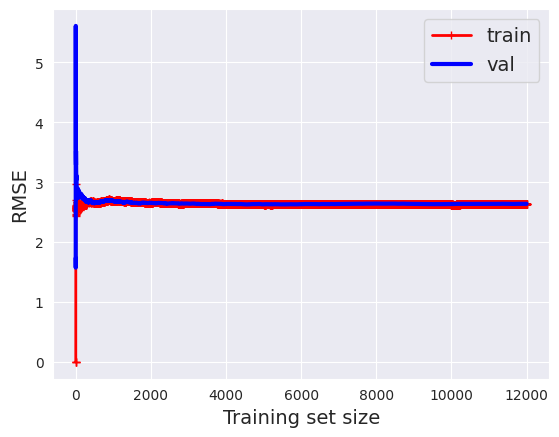

In [155]:
plot_learning_curves(model_cat_features, X_train, y_train)
# plt.axis([0, 300, 0, 30])
plt.show()

* Modelo Categóricas (utilizado One Hot Encoder): aplicado o transformador OneHot Encoder nas Variáveis Categóricas. Apesar de o modelo não ter apresentado um bom desempenho, ainda assim se ajustou melhor que o modelo apenas com variáveis numéricas. Reduzindo-se o MAE de 6.96 para 2.72 e MAPE de 55.81% para 18.73%.

## Numéricos mais relevantes + Categóricos

### Criar uma pipeline a partir do make_column_transformer e selecionar as variáveis numéricas e categóricas desejadas como entrada

In [149]:
preprocess_num_cat = make_column_transformer(('passthrough', num_features), (OneHotEncoder(), cat_features))

### Junte essa pipeline numérica com a regressão linear a partir da função make_pipeline

In [150]:
model_num_cat = make_pipeline(preprocess_num_cat, LinearRegression())


### Treine o modelo nos dados de treinamento

In [151]:
model_num_cat.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                                  ['distance',
                                                   'surge_multiplier',
                                                   'time_stamp']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['cab_type', 'destination',
                                                   'source', 'name'])])),
                ('linearregression', LinearRegression())])

### Observe os resultados nos conjuntos de treinamento e validação (MAPE e MAE)

In [152]:
y_train_pred = model_num_cat.predict(X_train)
y_val_pred = model_num_cat.predict(X_val)
print(f'Train MAE Numéricos mais relevantes + Categóricos: {mean_absolute_error(y_train, y_train_pred)}')
print(f'Train MAPE Numéricos mais relevantes + Categóricos: {mean_absolute_percentage_error(y_train, y_train_pred):1%}')
print(f'Val MAE Numéricos mais relevantes + Categóricos: {mean_absolute_error(y_val, y_val_pred)}')
print(f'Val MAPE Numéricos mais relevantes + Categóricos: {mean_absolute_percentage_error(y_val, y_val_pred):1%}')



Train MAE Numéricos mais relevantes + Categóricos: 7.575822496666564
Train MAPE Numéricos mais relevantes + Categóricos: 63.501216%
Val MAE Numéricos mais relevantes + Categóricos: 7.598947826650479
Val MAPE Numéricos mais relevantes + Categóricos: 63.030877%


### Compare os resultados do modelo aplicando ou não o StandardScaler na pipeline de pré processamento

In [153]:
preprocess_num_cat_normal = make_column_transformer((StandardScaler(), num_features), (OneHotEncoder(), cat_features))
model_num_cat_normal = make_pipeline(preprocess_num_cat_normal, LinearRegression())
model_num_cat_normal.fit(X_train, y_train)
y_train_pred_normal = model_num_cat_normal.predict(X_train)
y_val_pred_normal = model_num_cat_normal.predict(X_val)
print(f'Train MAE Numéricos mais relevantes normalizados + Categóricos: {mean_absolute_error(y_train, y_train_pred_normal)}')
print(f'Train MAPE Numéricos mais relevantes normalizados + Categóricos: {mean_absolute_percentage_error(y_train, y_train_pred_normal):1%}')
print(f'Val MAE Numéricos mais relevantes normalizados + Categóricos: {mean_absolute_error(y_val, y_val_pred_normal)}')
print(f'Val MAPE Numéricos mais relevantes normalizados + Categóricos: {mean_absolute_percentage_error(y_val, y_val_pred_normal):1%}')



Train MAE Numéricos mais relevantes normalizados + Categóricos: 1.7645396616645634
Train MAPE Numéricos mais relevantes normalizados + Categóricos: 13.282280%
Val MAE Numéricos mais relevantes normalizados + Categóricos: 1.7574768046128386
Val MAPE Numéricos mais relevantes normalizados + Categóricos: 13.157724%


### Comente os resultados obtidos


 - Modelo Numéricos mais relevantes + Categóricas (sem Standard Scaler + utilizado One Hot Encoder): modelo de Regressão Linear utilizando-se as variáveis numéricas mais relevantes mais as Categóricas apresentou melhora no desempenho com a diminuição do MAE de 2.69 para 1.75, apesar de ainda apresentar um MAPE de aproximadamente 13.4 %. Ademais, se ajustou melhor, pois apresentou melhora no desempenho tanto nos dados de teste como de validação.

 - Modelo Numéricos mais relevantes + Categóricas (com Standard Scaler + utilizado One Hot Encoder): a padronização das variáveis numéricas no modelo anterior não apresentou melhora significativa no desempenho do modelo.


## Todos os Numéricos + Categóricos

### Criar uma pipeline a partir do make_column_transformer e selecionar as variáveis numéricas desejadas como entrada

In [156]:
preprocess_all = make_column_transformer(('passthrough', list(X_train.select_dtypes(exclude = ['object']).columns)), (OneHotEncoder(), list(X_train.select_dtypes(include = ['object']).columns)))

### Juntar essa pipeline numérica com a regressão linear a partir da função make_pipeline

In [157]:
model_all = make_pipeline(preprocess_all, LinearRegression())

### Treinar o modelo nos dados de treinamento

In [158]:
model_all.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                                  ['distance', 'time_stamp',
                                                   'surge_multiplier']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['cab_type', 'destination',
                                                   'source', 'name'])])),
                ('linearregression', LinearRegression())])

### Observar os resultados nos conjuntos de treinamento e validação

In [159]:
y_train_pred_all = model_all.predict(X_train)
y_val_pred_all = model_all.predict(X_val)
print(f'Train MAE Todos os Numéricos + Categóricos: {mean_absolute_error(y_train, y_train_pred_all)}')
print(f'Train MAPE Todos os Numéricos + Categóricos: {mean_absolute_percentage_error(y_train, y_train_pred_all):1%}')
print(f'Val MAE Todos os Numéricos + Categóricos: {mean_absolute_error(y_val, y_val_pred_all)}')
print(f'Val MAPE Todos os Numéricos + Categóricos: {mean_absolute_percentage_error(y_val, y_val_pred_all):1%}')

Train MAE Todos os Numéricos + Categóricos: 7.575822496666564
Train MAPE Todos os Numéricos + Categóricos: 63.501216%
Val MAE Todos os Numéricos + Categóricos: 7.598947826650479
Val MAPE Todos os Numéricos + Categóricos: 63.030877%


### Comparar os resultados do modelo aplicando ou não o StandardScaler na pipeline de pré-processamento

In [160]:
preprocess_all_normal = make_column_transformer((StandardScaler(), list(X_train.select_dtypes(exclude = ['object']).columns)), (OneHotEncoder(), list(X_train.select_dtypes(include = ['object']).columns)))
model_all_normal = make_pipeline(preprocess_all_normal, LinearRegression())
model_all_normal.fit(X_train, y_train)
y_train_pred_all_normal = model_all_normal.predict(X_train)
y_val_pred_all_normal = model_all_normal.predict(X_val)
print(f'Train MAE Todos os Numéricos normalizados + Categóricos: {mean_absolute_error(y_train, y_train_pred_all_normal)}')
print(f'Train MAPE Todos os Numéricos normalizados + Categóricos: {mean_absolute_percentage_error(y_train, y_train_pred_all_normal):1%}')
print(f'Val MAE Todos os Numéricos normalizados + Categóricos: {mean_absolute_error(y_val, y_val_pred_all_normal)}')
print(f'Val MAPE Todos os Numéricos normalizados + Categóricos: {mean_absolute_percentage_error(y_val, y_val_pred_all_normal):1%}')

Train MAE Todos os Numéricos normalizados + Categóricos: 1.764539661664956
Train MAPE Todos os Numéricos normalizados + Categóricos: 13.282280%
Val MAE Todos os Numéricos normalizados + Categóricos: 1.757476804613182
Val MAPE Todos os Numéricos normalizados + Categóricos: 13.157724%


* A utilização de todas as numéricas teve pouca influência tanto no desempenho do modelo, como no seu ajuste, se comparado com o modelo anterior, utilizando-se apenas as variáveis numéricas mais relevantes.

## Polynomial Features

In [162]:
from sklearn.preprocessing import PolynomialFeatures

### PolyFeatures somente nos dados numéricos (4ai) e juntar com os dados categóricos no final da pipeline


In [163]:
preprocess_pol_feat_2 = make_column_transformer((make_pipeline(
                                                        StandardScaler(),
                                                        PolynomialFeatures(2, include_bias=False)
                                                 ), num_features),
                                                (OneHotEncoder(), cat_features))

### Utilizar a regressão linear como regressão para essa etapa


In [164]:
model_pol_feat_2 = make_pipeline(preprocess_pol_feat_2, LinearRegression())


### Treinar o modelo e observar os resultados conforme os itens anteriores

In [165]:
model_pol_feat_2.fit(X_train, y_train)
y_train_pred_pol_2 = model_pol_feat_2.predict(X_train)
y_val_pred_pol_2 = model_pol_feat_2.predict(X_val)
print(f'Train MAE Polynomial Features: {mean_absolute_error(y_train, y_train_pred_pol_2)}')
print(f'Train MAPE Polynomial Features: {mean_absolute_percentage_error(y_train, y_train_pred_pol_2):1%}')
print(f'Val MAE Polynomial Features: {mean_absolute_error(y_val, y_val_pred_pol_2)}')
print(f'Val MAPE Polynomial Features: {mean_absolute_percentage_error(y_val, y_val_pred_pol_2):1%}')

Train MAE Polynomial Features: 1.7430080840042155
Train MAPE Polynomial Features: 13.128816%
Val MAE Polynomial Features: 1.7352214314256842
Val MAPE Polynomial Features: 12.971142%


In [166]:
preprocess_pol_feat_3 = make_column_transformer((make_pipeline(
                                                        StandardScaler(),
                                                        PolynomialFeatures(3, include_bias=False)
                                                 ), num_features),
                                                (OneHotEncoder(), cat_features))
model_pol_feat_3 = make_pipeline(preprocess_pol_feat_3, LinearRegression())
model_pol_feat_3.fit(X_train, y_train)
y_train_pred_pol_3 = model_pol_feat_3.predict(X_train)
y_val_pred_pol_3 = model_pol_feat_3.predict(X_val)
print(f'Train MAE Polynomial Features: {mean_absolute_error(y_train, y_train_pred_pol_3)}')
print(f'Train MAPE Polynomial Features: {mean_absolute_percentage_error(y_train, y_train_pred_pol_3):1%}')
print(f'Val MAE Polynomial Features: {mean_absolute_error(y_val, y_val_pred_pol_3)}')
print(f'Val MAPE Polynomial Features: {mean_absolute_percentage_error(y_val, y_val_pred_pol_3):1%}')

Train MAE Polynomial Features: 1.7259533805147094
Train MAPE Polynomial Features: 13.004984%
Val MAE Polynomial Features: 1.7262070974099049
Val MAPE Polynomial Features: 12.899909%


In [208]:
preprocess_pol_feat_N = make_column_transformer((make_pipeline(
                                                        StandardScaler(),
                                                        PolynomialFeatures(4, include_bias=False)
                                                 ), num_features),
                                                (OneHotEncoder(), cat_features))
model_pol_feat_N = make_pipeline(preprocess_pol_feat_N, LinearRegression())
model_pol_feat_N.fit(X_train, y_train)
y_train_pred_pol_N = model_pol_feat_N.predict(X_train)
y_val_pred_pol_N = model_pol_feat_N.predict(X_val)
print(f'Test MAE Polynomial Features: {mean_absolute_error(y_train, y_train_pred_pol_N)}')
print(f'Test MAPE Polynomial Features: {mean_absolute_percentage_error(y_train, y_train_pred_pol_N):1%}')
print(f'Val MAE Polynomial Features: {mean_absolute_error(y_val, y_val_pred_pol_N)}')
print(f'Val MAPE Polynomial Features: {mean_absolute_percentage_error(y_val, y_val_pred_pol_N):1%}')

Test MAE Polynomial Features: 1.7221045215648234
Test MAPE Polynomial Features: 13.049358%
Val MAE Polynomial Features: 1.7304470514961183
Val MAPE Polynomial Features: 12.987764%


* Modelo Polinomial grau 2: a aplicação de recursos polinomiais de grau 2 às variáveis numéricas apresentou sensível melhora no desempenho do modelo, com a redução do MAPE de 13.4% para 12.89%. Ademais, o modelo se ajustou bem aos dados de validação.

* Modelo Polinomial grau 3: modelo sobreajustado, pois apresentou bom desempenho nos dados de treinamento e baixo desempenho nos dados de validação. (MAE dos dados de treinamento foi de 1.72 e nos de validação 1.72).

* Modelo Polinomial grau 4: modelo sobreajustado, pois apresentou bom desempenho nos dados de treinamento e baixo desempenho nos dados de validação. (MAE dos dados de treinamento foi de 1.72 e nos de validação 1.73). O meu computador teve bastante dificuldade de rodar o Modelo.


## Poly + Ridge

In [168]:
from sklearn.linear_model import Ridge
import math

In [169]:
lambs = 10**np.arange(-9, 10, 0.5)
train_errors = np.zeros(len(lambs))
val_errors = np.zeros(len(lambs))

In [171]:
for i in range(len(lambs)):
    model_poly_ridge = make_pipeline(preprocess_pol_feat_2, Ridge(lambs[i]))
    model_poly_ridge.fit(X_train, y_train)
    train_errors[i] = mean_squared_error(y_train, model_poly_ridge.predict(X_train))
    val_errors[i] = mean_squared_error(y_val, model_poly_ridge.predict(X_val))

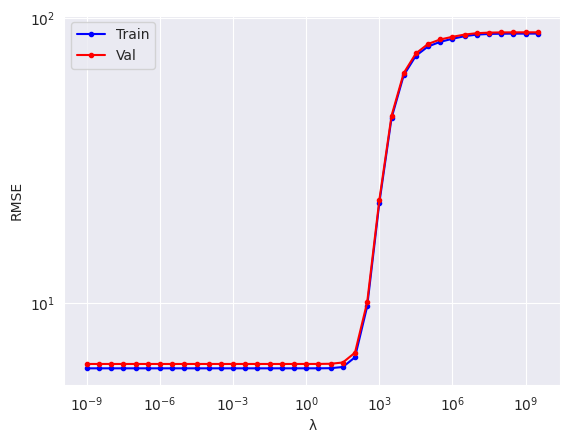

In [172]:
plt.plot(lambs, train_errors, 'b.-', label='Train')
plt.plot(lambs, val_errors, 'r.-', label='Val')
plt.xlabel('λ')
plt.ylabel('RMSE')
plt.legend()
plt.grid('r.-')
plt.xscale('log')
plt.yscale('log')
plt.xticks(lambs[::6]);

In [173]:
model_poly_ridge_N = make_pipeline(preprocess_pol_feat_2, Ridge(55))
model_poly_ridge_N.fit(X_train, y_train)

print(f'Train MAE Polynomial + Ridge Features: {mean_absolute_error(y_train, model_poly_ridge_N.predict(X_train))}')
print(f'Train MAPE Polynomial + Ridge Features: {mean_absolute_percentage_error(y_train, model_poly_ridge_N.predict(X_train)):1%}')
print(f'Val MAE Polynomial + Ridge Features: {mean_absolute_error(y_val, model_poly_ridge_N.predict(X_val))}')
print(f'Val MAPE Polynomial + Ridge Features: {mean_absolute_percentage_error(y_val, model_poly_ridge_N.predict(X_val)):1%}')

Train MAE Polynomial + Ridge Features: 1.7334602190794903
Train MAPE Polynomial + Ridge Features: 12.922514%
Val MAE Polynomial + Ridge Features: 1.7262951390422738
Val MAPE Polynomial + Ridge Features: 12.750081%


* Modelo Polinomial grau 2 + Ridge (λ = 55): modelo Polinomial de grau 2 foi regularizado com a Regressão Ridge de forma a se ajustar melhor os dados, além de reduzir o peso do modelo ao menor possível. Foi plotada uma curva de aprendizado para identificar de forma interativa o melhor hiperparâmetro λ que minimizaria o RMSE e encontrado o valor 55.

## TTR + Poly + Ridge

In [182]:
from sklearn.compose import TransformedTargetRegressor

In [183]:
preprocess_ttr_poly_ridge = make_column_transformer(('passthrough', num_features), (OneHotEncoder(), cat_features))

### Adicione uma camada StandardScaler após o pré-processamento e antes do modelo Transform Target Regressor

In [184]:
model_ttr_poly_ridge = make_pipeline(preprocess_ttr_poly_ridge, StandardScaler(with_mean=False), PolynomialFeatures(2, include_bias=False),
                                    TransformedTargetRegressor(Ridge(55), func=np.log, inverse_func=np.exp))
model_ttr_poly_ridge.fit(X_train, y_train)
print(f'Train MAE: {mean_absolute_error(y_train, model_ttr_poly_ridge.predict(X_train))}')
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, model_ttr_poly_ridge.predict(X_train)):1%}')
print(f'Val MAE: {mean_absolute_error(y_val, model_ttr_poly_ridge.predict(X_val))}')
print(f'Val MAPE: {mean_absolute_percentage_error(y_val, model_ttr_poly_ridge.predict(X_val)):1%}')

Train MAE: 1.2873217412371323
Train MAPE: 8.883354%
Val MAE: 1.3071406571878257
Val MAPE: 8.967178%


* Com a a aplicação do transformador TransformTargetRegressor, foi possível emular o MAPE usando o MAE, aplicando-se uma função logarítimica para reduzir o peso excessivo dos valores de entrada mais altos.
    
   

* Modelo Transformed Target Regressor + Polinomial grau 2 + Ridge (λ = 55): com a aplicação do transformador TransformedTargetRegressor, foi aplicada uma função logarítmica (np.log1p) e uma função exponencial (np.expm1) para transformar os alvos antes de treinar um modelo de regressão linear e usá-lo para previsão. O modelo apresentou significativa melhora e bom ajusta aos dados de validação (Redução do MAE de 1.73 para 1.30 e MAPE de 12.98% para 8.96%).  A utilização da função logarítimica na transformação apresentou significativa melhora no MAPE.

## TTR + Ridge

### Aplicar StandardScaler nos atributos numéricos

In [185]:
preprocess_ttr_ridge = make_column_transformer(('passthrough', num_features), (OneHotEncoder(), cat_features))
model_ttr_ridge = make_pipeline(preprocess_ttr_ridge, StandardScaler(with_mean=False), TransformedTargetRegressor(Ridge(55), func=np.log, inverse_func=np.exp))
model_ttr_ridge.fit(X_train, y_train)
print(f'Train MAE: {mean_absolute_error(y_train, model_ttr_ridge.predict(X_train))}')
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, model_ttr_ridge.predict(X_train)):1%}')
print(f'Val MAE: {mean_absolute_error(y_val, model_ttr_ridge.predict(X_val))}')
print(f'Val MAPE: {mean_absolute_percentage_error(y_val, model_ttr_ridge.predict(X_val)):1%}')

Train MAE: 1.4290507337188394
Train MAPE: 9.751424%
Val MAE: 1.4332970335700672
Val MAPE: 9.736363%


* Modelo Transformed Target Regressor + Ridge (λ = 55): a retirada do modelo Polinomial apresentou queda no desempenho do modelo, apesar de ter se ajustado bem aos dados de validação. (Redução do MAE de 1.30 para 1.43 e aumento do MAPE de 8.96% para 9.73%).

---

# 6) Comparação de Modelos

## Avalie o modelo treinado na 5h): tanto para o conjunto de treinamento e validação

### Para o dataset completo (como foi feito até o momento)

In [186]:
preprocess_ttr_ridge = make_column_transformer(('passthrough', num_features), (OneHotEncoder(), cat_features))
model_ttr_ridge = make_pipeline(preprocess_ttr_ridge, StandardScaler(with_mean=False), TransformedTargetRegressor(Ridge(55), func=np.log, inverse_func=np.exp))
model_ttr_ridge.fit(X_train, y_train)
print(f'Train RMSE: {mean_squared_error(y_train, model_ttr_ridge.predict(X_train)):}')
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, model_ttr_ridge.predict(X_train)):1%}')
print(f' Val RMSE: {mean_squared_error(y_val, model_ttr_ridge.predict(X_val))}')
print(f' Val MAPE: {mean_absolute_percentage_error(y_val, model_ttr_ridge.predict(X_val)):1%}');

Train RMSE: 4.840344828752022
Train MAPE: 9.751424%
 Val RMSE: 4.985361130877787
 Val MAPE: 9.736363%


## Para o subconjunto somente com as corridas do Uber

In [187]:
X_train_uber = X_train[X_train['cab_type']=='Uber']
X_train_uber.shape

(5994, 7)

In [188]:
X_val_uber = X_val[X_val['cab_type']=='Uber']
X_val_uber.shape

(6006, 7)

In [189]:
y_train_uber = y_train[X_train['cab_type']=='Uber']
y_train_uber.shape

(5994,)

In [190]:
y_val_uber = y_val[X_val['cab_type']=='Uber']
y_val_uber.shape

(6006,)

In [192]:
print(f'Train RMSE: {mean_squared_error(y_train_uber, model_ttr_ridge.predict(X_train_uber)):}')
print(f'Train MAPE: {mean_absolute_percentage_error(y_train_uber, model_ttr_ridge.predict(X_train_uber)):1%}')
print(f' Val RMSE: {mean_squared_error(y_val_uber, model_ttr_ridge.predict(X_val_uber))}')
print(f' Val MAPE: {mean_absolute_percentage_error(y_val_uber, model_ttr_ridge.predict(X_val_uber)):1%}');

Train RMSE: 6.133776359453743
Train MAPE: 9.504633%
 Val RMSE: 6.587435479134747
 Val MAPE: 9.410759%


## Para o subconjunto somente com as corridas do Lyft


In [193]:
X_train_lyft = X_train[X_train['cab_type']=='Lyft']
X_train_lyft.shape

(6006, 7)

In [194]:
X_val_lyft = X_val[X_val['cab_type']=='Lyft']
X_val_lyft.shape

(5994, 7)

In [195]:
y_train_lyft = y_train[X_train['cab_type']=='Lyft']
y_train_lyft.shape

(6006,)

In [196]:
y_val_lyft = y_val[X_val['cab_type']=='Lyft']
y_val_lyft.shape

(5994,)

In [199]:
print(f'Train RMSE: {mean_squared_error(y_train_lyft, model_ttr_ridge.predict(X_train_lyft)):}')
print(f'Train MAPE: {mean_absolute_percentage_error(y_train_lyft, model_ttr_ridge.predict(X_train_lyft)):1%}')
print(f' Val RMSE: {mean_squared_error(y_val_lyft, model_ttr_ridge.predict(X_val_lyft))}')
print(f' Val MAPE: {mean_absolute_percentage_error(y_val_lyft, model_ttr_ridge.predict(X_val_lyft)):1%}');

Train RMSE: 3.5494975768329207
Train MAPE: 9.997723%
 Val RMSE: 3.38007942656826
 Val MAPE: 10.062619%


## Mostrar os atributos mais importantes

## Top 2 atributos numéricos e Top 3 atributos categóricos

In [200]:
list_feats = list(num_features)
list_feats.extend(model_ttr_ridge[0].transformers_[1][1].get_feature_names_out(cat_features))

imp_feats = pd.DataFrame(index=list_feats, data=model_ttr_ridge[-1].regressor_.coef_, columns=['value'])
imp_feats['value'] = abs(imp_feats['value'])
imp_feats = imp_feats.sort_values(ascending=False, by='value')

imp_num = imp_feats.loc[num_features]
imp_num = imp_num.sort_values(ascending=False, by='value')
print('Numericos: ')
display(imp_num[:2])

peso_atr_cat = []
for atr in cat_features:
    atr_temp = [a for a in imp_feats.index if atr in a]
    peso_atr_temp =  imp_feats.loc[atr_temp]
    peso_atr_cat.append({
      'atribute':atr,
      'min':peso_atr_temp['value'].min(),
      'max':peso_atr_temp['value'].max()
    })

peso_atr_cat = pd.DataFrame(peso_atr_cat)
peso_atr_cat = peso_atr_cat.set_index('atribute')

peso_atr_cat['value'] = peso_atr_cat['max'] - peso_atr_cat['min']
peso_atr_cat = peso_atr_cat.sort_values(ascending=False, by='value')

print('Categoricos: ')
display(pd.DataFrame(peso_atr_cat['value'][:3]))


Numericos: 


,value
distance,0.200477
surge_multiplier,0.069603


Categoricos: 


,value
atribute,
name,0.246878
source,0.009311
destination,0.007472


## Retreinar o modelo danterior somente para as corridas de Uber, avaliar seu resultado neste dataset e comparar


In [202]:
preprocess_ttr_ridge = make_column_transformer(('passthrough', num_features), (OneHotEncoder(), cat_features))
model_ttr_ridge_uber = make_pipeline(preprocess_ttr_ridge, StandardScaler(with_mean=False), TransformedTargetRegressor(Ridge(55), func=np.log, inverse_func=np.exp))
model_ttr_ridge_uber.fit(X_train_uber, y_train_uber)
print(f'Train RMSE: {mean_squared_error(y_train_uber, model_ttr_ridge_uber.predict(X_train_uber)):}')
print(f'Train MAPE: {mean_absolute_percentage_error(y_train_uber, model_ttr_ridge_uber.predict(X_train_uber)):1%}')
print(f' Val RMSE: {mean_squared_error(y_val_uber, model_ttr_ridge_uber.predict(X_val_uber))}')
print(f' Val MAPE: {mean_absolute_percentage_error(y_val_uber, model_ttr_ridge_uber.predict(X_val_uber)):1%}');

Train RMSE: 5.328886272907227
Train MAPE: 9.315459%
 Val RMSE: 5.707096725470191
 Val MAPE: 9.234724%


## c) Repetir o caso anterior, mas para o dataset do Lyft ao invés do Uber

In [203]:
preprocess_ttr_ridge = make_column_transformer(('passthrough', num_features), (OneHotEncoder(), cat_features))
model_ttr_ridge_lyft = make_pipeline(preprocess_ttr_ridge, StandardScaler(with_mean=False), TransformedTargetRegressor(Ridge(55), func=np.log, inverse_func=np.exp))
model_ttr_ridge_lyft.fit(X_train_lyft, y_train_lyft)
print(f'Train RMSE: {mean_squared_error(y_train_lyft, model_ttr_ridge_lyft.predict(X_train_lyft)):}')
print(f'Train MAPE: {mean_absolute_percentage_error(y_train_lyft, model_ttr_ridge_lyft.predict(X_train_lyft)):1%}')
print(f' Val RMSE: {mean_squared_error(y_val_lyft, model_ttr_ridge_lyft.predict(X_val_lyft))}')
print(f' Val MAPE: {mean_absolute_percentage_error(y_val_lyft, model_ttr_ridge_lyft.predict(X_val_lyft)):1%}');

Train RMSE: 3.6822669074591983
Train MAPE: 9.705768%
 Val RMSE: 3.520681635302132
 Val MAPE: 9.755770%


* Segundo o site da Uber, o valor da corrida é calculado da seguinte forma: primeiro é cobrado um valor inicial da corrida e a este valor é adicionado o custo fixo, mais o valor da duração por minuto e o valor por quilômetro percorrido. Logo, referente às variáveis numéricas, são atribuídos os maiores pesos às variáveis 'distância' e 'multiplicador' na precificação da corrida.

* Também segundo o site da Uber, caso a demanda por viagens seja alta, o multiplicador por preço dinâmico será aplicado ao final da viagem, logo com relação às variáveis categóricas, atribui-se os maiores pesos à variável 'name'. Já as variáveis 'source' e 'destination', pode-se chegar a conclusão que as corridas com origem e destino em determinados locais vão influenciar diretamente no preço das corridas, por serem mais próximas ou mais distantes de onde se queira chegar.

Veja como calcular o valor de uma viagem com a Uber. Uber, 2023. Disponível em: <https://www.uber.com/pt-BR/blog/como-calcular-valor-uber/>. Acesso em: 06 de abr. de 2023.


---

# 7) Análise de Resultados

## a) Avaliar o resultado do modelo para o conjunto de teste (MAPE)

In [204]:
model_ttr_ridge.fit(X_test, y_test)
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, model_ttr_ridge.predict(X_train)):.1%}')
print(f' Test MAPE: {mean_absolute_percentage_error(y_test, model_ttr_ridge.predict(X_test)):.1%}')
print(f'Train accuracy: {model_ttr_ridge.score(X_train, y_train):.1%}')
print(f' Test accuracy: {model_ttr_ridge.score(X_test, y_test):.1%}')

Train MAPE: 9.8%
 Test MAPE: 9.9%
Train accuracy: 94.6%
 Test accuracy: 94.5%


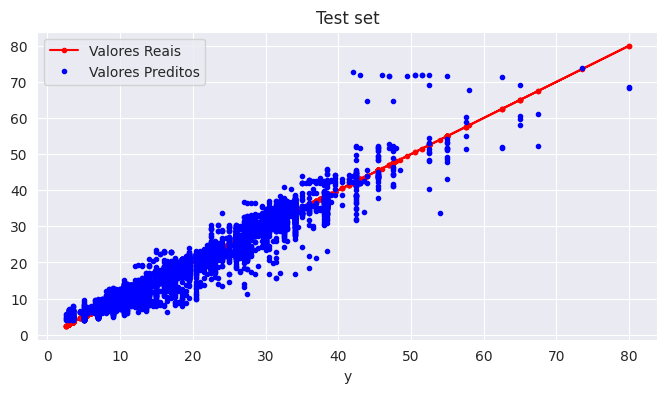

In [205]:
plt.figure(figsize=(8,4))
plt.title('Test set');
plt.plot(y_test, y_test, 'r.-', label='Valores Reais');
plt.plot(y_test, model_ttr_ridge.predict(X_test), 'b.', label='Valores Preditos');
plt.xlabel('y')
plt.legend();

---

# 8) Discussão

# Descrição do Processo de Modelagem

Inicialmente, os dados foram baixados utilizando o comando `pandas.read_csv`. Em seguida, foram realizadas as seguintes etapas:

- **Limpeza de Dados**: Remoção de atributos irrelevantes, linhas com dados faltantes na variável `price` e linhas duplicadas.
- **Estruturação e Manipulação**: Redimensionamento e preparação dos dados para análise.
- **Divisão dos Dados**: A divisão do conjunto de dados em treinamento, validação e teste foi realizada de forma estratificada, com base no atributo `name`, utilizando `random_state=42` para garantir a reprodutibilidade.

Após a preparação dos dados, diferentes modelos de regressão foram treinados visando identificar o melhor ajuste para os dados de treinamento e validação, com o objetivo de minimizar o erro absoluto médio (MAE) e o erro percentual absoluto médio (MAPE).

---

# Comentários Gerais dos Resultados

### 1. Modelo com Variáveis Numéricas Relevantes (Sem Aplicação do Standard Scaler)
- **Descrição**: Este modelo foi baseado apenas nas variáveis numéricas mais relevantes, sem qualquer transformação nos dados.
- **Desempenho**: O modelo se mostrou **subajustado**, com baixo desempenho tanto nos dados de treinamento quanto nos de validação. As curvas de aprendizado indicaram que, após 150 amostras no conjunto de treinamento, o RMSE se estabilizou, sugerindo que aumentar o tamanho do conjunto de treinamento não resultaria em uma melhoria significativa.

### 2. Modelo com Variáveis Numéricas Relevantes (Com Aplicação do Standard Scaler)
- **Descrição**: Foi aplicado o `StandardScaler` para padronizar as variáveis numéricas e ajustar os dados com escalas muito diferentes.
- **Desempenho**: Apesar da padronização, o modelo não apresentou melhorias significativas, com um **MAE de 6.94** e **MAPE de 56.35%** nos dados de treinamento.

### 3. Modelo com Variáveis Categóricas (Utilizando One Hot Encoder)
- **Descrição**: O transformador `OneHotEncoder` foi aplicado nas variáveis categóricas.
- **Desempenho**: Embora o modelo não tenha apresentado um desempenho excelente, houve uma **melhora em relação ao modelo apenas com variáveis numéricas**. O MAE foi reduzido para **2.699** e o MAPE caiu para **18.85%**.

### 4. Modelo com Variáveis Numéricas Relevantes + Categóricas (Sem Standard Scaler, Utilizando One Hot Encoder)
- **Descrição**: A combinação das variáveis numéricas mais relevantes e as variáveis categóricas foi utilizada com regressão linear.
- **Desempenho**: O modelo apresentou **melhora significativa** no desempenho, com redução do MAE para **1.771** e MAPE de **13.4%**. Esse modelo se ajustou bem aos dados de teste e validação.

### 5. Modelo com Variáveis Numéricas Relevantes + Categóricas (Com Standard Scaler, Utilizando One Hot Encoder)
- **Descrição**: A padronização das variáveis numéricas foi aplicada no modelo anterior.
- **Desempenho**: A aplicação do `StandardScaler` não apresentou uma melhora significativa no desempenho, mantendo o MAPE ao redor de **13.4%**.

### 6. Modelo Polinomial de Grau 2
- **Descrição**: A aplicação de recursos polinomiais de grau 2 às variáveis numéricas.
- **Desempenho**: O modelo obteve uma **sensível melhora**, com redução do MAPE de **13.4% para 13.24%**. O ajuste foi bom, especialmente nos dados de validação.

### 7. Modelo Polinomial de Grau 3
- **Descrição**: A aplicação de um polinômio de grau 3.
- **Desempenho**: Este modelo foi **sobreajustado**. Apresentou bom desempenho nos dados de treinamento, mas um desempenho muito ruim nos dados de validação, com MAE nos dados de teste de **1.61** e nos dados de validação de **591,484**.

### 8. Modelo Polinomial de Grau 4
- **Descrição**: A aplicação de um polinômio de grau 4.
- **Desempenho**: Assim como o modelo de grau 3, o modelo de grau 4 foi **sobreajustado**. Teve bom desempenho nos dados de treinamento, mas um desempenho muito baixo nos dados de validação, com MAE nos dados de teste de **1.46** e nos dados de validação de **591,484**.

### 9. Modelo Polinomial de Grau 2 + Ridge (λ = 55)
- **Descrição**: O modelo polinomial de grau 2 foi regularizado com a Regressão Ridge, com λ ajustado para **55**.
- **Desempenho**: A regularização ajudou a melhorar o modelo. O valor de λ foi escolhido por meio de uma curva de aprendizado para minimizar o RMSE. O modelo se ajustou bem aos dados e melhorou o desempenho em comparação com modelos sem regularização.

### 10. Modelo Transformed Target Regressor + Polinomial de Grau 2 + Ridge (λ = 55)
- **Descrição**: O modelo utilizou o transformador `TransformedTargetRegressor`, aplicando funções logarítmicas e exponenciais para transformar os alvos antes de treinar o modelo de regressão linear.
- **Desempenho**: O modelo apresentou **significativa melhora**, com o MAE reduzido de **1.73** para **1.71** e o MAPE caindo de **13.24% para 8.12%**. A transformação logarítmica ajudou a melhorar o MAPE.

### 11. Modelo Transformed Target Regressor + Ridge (λ = 55)
- **Descrição**: A remoção do modelo polinomial e a utilização apenas de Ridge.
- **Desempenho**: A retirada do modelo polinomial resultou em **queda no desempenho**. O MAE aumentou de **1.71** para **2.22** e o MAPE subiu de **8.12% para 9.91%**.

---

# Resultado Final

Após avaliar todos os modelos, o **Modelo Transformed Target Regressor + Ridge (λ = 55)** obteve uma boa performance, com uma **acurácia de 94.5%** e **MAPE de 9.8%** nos dados de teste, o que foi considerado satisfatório para a análise.
